# 11. Multi-omics Analysis
## 11.1 Use case: Multi-omics data from colorectal cancer

### RNA-seq データ

In [1]:
# リードカウントした CSV ファイルの読み込み
csvfile <- file.path("../data/multi-omics/COREAD_CMS13_gex.csv")
x1 <- read.csv(csvfile, row.names=1)

# 遺伝子名を修正
rownames(x1) <- sapply(strsplit(rownames(x1), "\\|"), function(x) x[1])

In [2]:
x1[1:10,]

,TCGA.A6.2672,TCGA.A6.3809,TCGA.A6.5661,TCGA.A6.5665,TCGA.A6.6653,TCGA.A6.6780,TCGA.AA.3492,TCGA.AA.3502,TCGA.AA.3655,TCGA.AA.3663,⋯,TCGA.AG.A020,TCGA.AG.A02N,TCGA.AG.A02X,TCGA.AH.6544,TCGA.EI.6507,TCGA.EI.6510,TCGA.EI.6512,TCGA.EI.6882,TCGA.EI.6917,TCGA.F5.6814
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RNF113A,21.19567,21.50866,20.08072,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.09546,⋯,0.00000,15.07003,0.00000,0.00000,11.644673,11.67360,11.71760,0.00000,13.00365,11.36348
S100A13,19.72600,18.65729,18.97034,11.88336,12.07753,12.99128,0.00000,0.00000,11.87451,12.17971,⋯,14.68604,13.15442,0.00000,11.98153,11.728916,0.00000,0.00000,13.14613,0.00000,0.00000
AP3D1,11.53022,12.98830,10.83759,10.24248,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,15.13181,19.18853,0.00000,0.00000,0.000000,0.00000,0.00000,14.63363,19.87092,18.00765
ATP6V1G1,0.00000,14.12675,15.31325,19.79300,0.00000,19.96976,16.12002,13.99712,0.00000,0.00000,⋯,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,20.58036,18.13914,0.00000,0.00000
UBQLN4,15.35637,19.62208,0.00000,0.00000,0.00000,13.17618,0.00000,0.00000,0.00000,0.00000,⋯,0.00000,13.33931,13.72789,0.00000,0.000000,13.52743,11.98671,0.00000,0.00000,0.00000
TPPP3,12.76747,0.00000,0.00000,0.00000,0.00000,11.58742,16.85841,17.83853,0.00000,0.00000,⋯,13.28198,16.99805,18.46065,0.00000,12.324623,0.00000,0.00000,14.06384,0.00000,11.04374
TSSC4,0.00000,0.00000,22.37482,0.00000,11.07787,0.00000,0.00000,0.00000,18.03400,0.00000,⋯,17.69722,18.80531,18.36305,15.47306,9.730191,16.73472,14.44536,18.10598,15.36079,17.25457
FOS,16.48975,21.27498,0.00000,13.03154,0.00000,13.13965,13.24116,14.53314,12.02286,0.00000,⋯,0.00000,0.00000,14.69131,0.00000,0.000000,11.90620,11.95019,12.29465,12.65139,12.59583
ERBB3,17.70886,18.11590,19.78531,0.00000,0.00000,0.00000,0.00000,13.46282,11.95249,12.25770,⋯,14.34902,0.00000,14.62092,12.05952,11.806896,11.83583,11.87982,0.00000,12.58102,12.52545


In [3]:
library("knitr")

In [4]:
# テーブル出力
knitr::kable(head(t(head(x1))), caption="Example gene expression data (head)")



Table: Example gene expression data (head)

|             |  RNF113A|  S100A13|    AP3D1| ATP6V1G1|   UBQLN4|    TPPP3|
|:------------|--------:|--------:|--------:|--------:|--------:|--------:|
|TCGA.A6.2672 | 21.19567| 19.72600| 11.53022|  0.00000| 15.35637| 12.76747|
|TCGA.A6.3809 | 21.50866| 18.65729| 12.98830| 14.12675| 19.62208|  0.00000|
|TCGA.A6.5661 | 20.08072| 18.97034| 10.83759| 15.31325|  0.00000|  0.00000|
|TCGA.A6.5665 |  0.00000| 11.88336| 10.24248| 19.79300|  0.00000|  0.00000|
|TCGA.A6.6653 |  0.00000| 12.07753|  0.00000|  0.00000|  0.00000|  0.00000|
|TCGA.A6.6780 |  0.00000| 12.99128|  0.00000| 19.96976| 13.17618| 11.58742|

### Mutation データ

In [9]:
# mutation データの読み込み
csvfile <- file.path("../data/multi-omics/COREAD_CMS13_muts.csv")
x2 <- read.csv(csvfile, row.names=1)
# 2値データに変換 (mutation があるかないか)
x2[x2>0]=1

In [10]:
x2[1:10,]

,TCGA.A6.2672,TCGA.A6.3809,TCGA.A6.5661,TCGA.A6.5665,TCGA.A6.6653,TCGA.A6.6780,TCGA.AA.3492,TCGA.AA.3502,TCGA.AA.3655,TCGA.AA.3663,⋯,TCGA.AG.A020,TCGA.AG.A02N,TCGA.AG.A02X,TCGA.AH.6544,TCGA.EI.6507,TCGA.EI.6510,TCGA.EI.6512,TCGA.EI.6882,TCGA.EI.6917,TCGA.F5.6814
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TTN,1,1,1,1,1,1,1,1,0,1,⋯,1,0,1,0,1,1,0,1,1,1
TP53,0,0,0,0,0,0,0,0,1,0,⋯,1,0,1,1,1,0,1,1,1,1
APC,0,0,0,0,0,0,0,1,1,0,⋯,1,0,1,1,0,0,1,1,1,1
KRAS,0,0,0,0,1,0,0,1,1,1,⋯,1,0,1,1,1,1,1,1,0,0
SYNE1,1,0,1,1,0,0,1,0,0,1,⋯,0,0,1,0,1,1,0,1,1,1
MUC16,1,0,1,1,0,1,1,0,0,1,⋯,0,0,0,0,1,0,1,0,1,1
PIK3CA,0,0,0,0,0,1,0,0,0,1,⋯,1,1,0,1,0,0,0,0,1,1
FAT4,1,1,1,1,1,0,0,0,0,1,⋯,0,0,0,0,1,0,1,0,1,1
OBSCN,1,1,0,1,1,1,1,0,1,1,⋯,0,0,0,1,1,0,0,1,0,1


In [11]:
# テーブル出力
knitr::kable(head(t(head(x2))), caption="Example mutation data (head)")



Table: Example mutation data (head)

|             | TTN| TP53| APC| KRAS| SYNE1| MUC16|
|:------------|---:|----:|---:|----:|-----:|-----:|
|TCGA.A6.2672 |   1|    0|   0|    0|     1|     1|
|TCGA.A6.3809 |   1|    0|   0|    0|     0|     0|
|TCGA.A6.5661 |   1|    0|   0|    0|     1|     1|
|TCGA.A6.5665 |   1|    0|   0|    0|     1|     1|
|TCGA.A6.6653 |   1|    0|   0|    1|     0|     0|
|TCGA.A6.6780 |   1|    0|   0|    0|     0|     1|

### コピー数多型 (Copy number variation)データ

In [31]:
# CSV ファイルの読み込み
csvfile <- file.path("../data/multi-omics/COREAD_CMS13_cnv.csv")
x3 <- read.csv(csvfile, row.names=1)

In [32]:
# テーブル出力
knitr::kable(head(t(head(x3))), 
             caption="Example copy number data for CRC samples")



Table: Example copy number data for CRC samples

|             | 8p23.2| 8p23.3| 8p23.1| 8p21.3| 8p12| 8p22|
|:------------|------:|------:|------:|------:|----:|----:|
|TCGA.A6.2672 |      0|      0|      0|      0|    0|    0|
|TCGA.A6.3809 |      0|      0|      0|      0|    0|    0|
|TCGA.A6.5661 |      0|      0|      0|      0|    0|    0|
|TCGA.A6.5665 |      0|      0|      0|      0|    0|    0|
|TCGA.A6.6653 |      0|      0|      0|      0|    0|    0|
|TCGA.A6.6780 |      0|      0|      0|      0|    0|    0|

### tumor の subtype データ

In [14]:
# CSV ファイルの読み込み
csvfile <- file.path("../data/multi-omics/COREAD_CMS13_subtypes.csv")
covariates <- read.csv(csvfile, row.names=1)

# TCGA identifiers(データ名)の修正（他と比較できるように）
rownames(covariates) <- gsub(pattern = '-', replacement = '\\.',
                             rownames(covariates))
covariates <- covariates[colnames(x1),]

# グラフ化するときのアノテーション名を用意
anno_col <- data.frame(cms=as.factor(covariates$cms_label))
rownames(anno_col) <- rownames(covariates)

In [17]:
covariates[1:10,]

,dataset,age,gender,stage,pt,pn,pm,tnm,grade,msi,cimp,kras_mut,braf_mut,cms_label,osMo,osStat,rfsMo,rfsStat
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<lgl>,<lgl>
TCGA.A6.2672,tcga,82,female,3,3,1,0,IIIB,NA,msi,CIMP.High,0,0,CMS1,16.536986,0,NA,NA
TCGA.A6.3809,tcga,71,female,2,4,0,0,IIB/IIC,NA,msi,CIMP.High,NA,NA,CMS1,10.290411,0,NA,NA
TCGA.A6.5661,tcga,80,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,10.060274,0,NA,NA
TCGA.A6.5665,tcga,84,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,9.402740,0,NA,NA
TCGA.A6.6653,tcga,82,male,1,2,0,0,I,NA,msi,CIMP.High,1,1,CMS1,2.958904,0,NA,NA
TCGA.A6.6780,tcga,74,male,2,3,0,NA,IIA,NA,msi,CIMP.Low,0,0,CMS1,2.827397,0,NA,NA
TCGA.AA.3492,tcga,90,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,0.000000,0,NA,NA
TCGA.AA.3502,tcga,73,male,1,2,0,0,I,NA,mss,CIMP.Low,1,0,CMS3,1.019178,0,NA,NA
TCGA.AA.3655,tcga,68,male,2,3,0,0,IIA,NA,mss,CIMP.Neg,1,0,CMS3,0.000000,0,NA,NA


In [18]:
anno_col[1:10,]

[1] CMS1 CMS1 CMS1 CMS1 CMS1 CMS1 CMS1 CMS3 CMS3 CMS3
Levels: CMS1 CMS3

### データの可視化

In [27]:
library("pheatmap")


Attaching package: ‘pheatmap’


The following object is masked from ‘package:ComplexHeatmap’:

    pheatmap




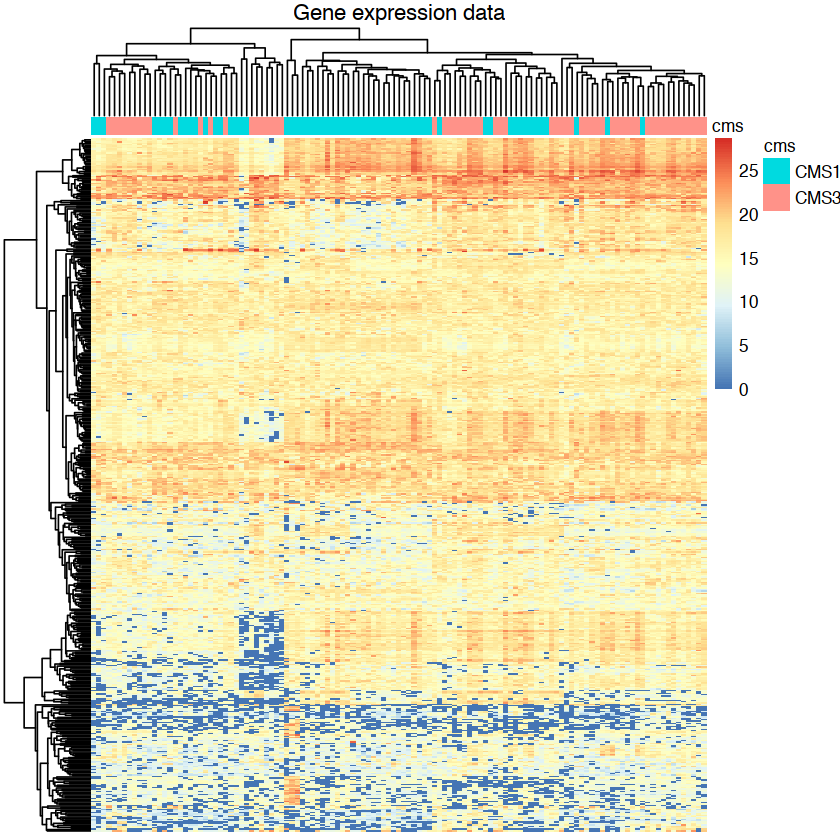

In [28]:
pheatmap::pheatmap(x1,
                   annotation_col = anno_col,
                   show_colnames = FALSE,
                   show_rownames = FALSE,
                   main="Gene expression data")

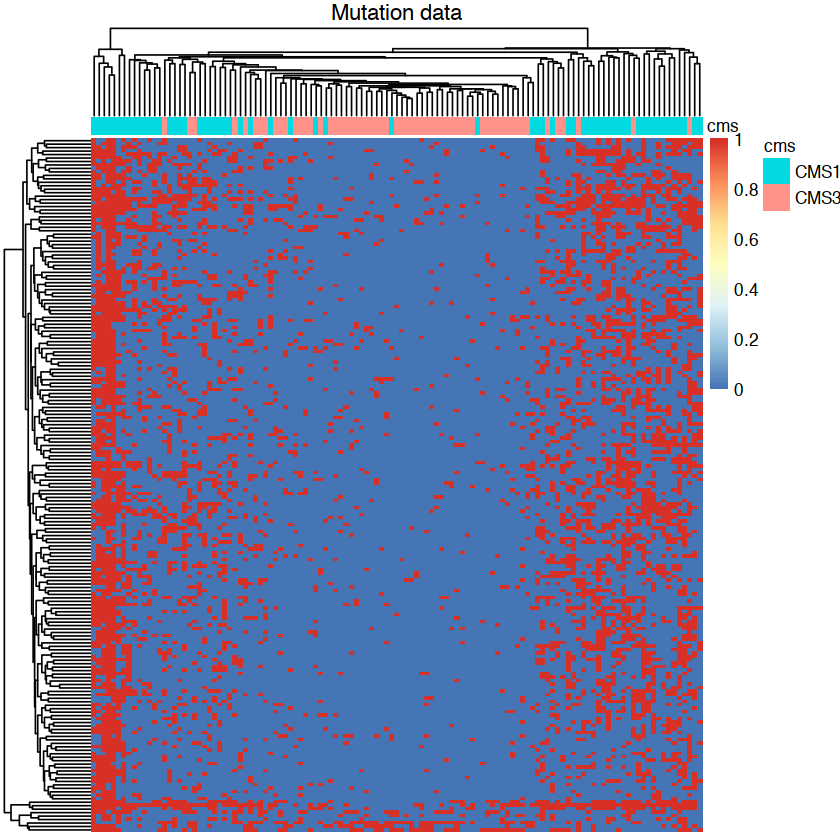

In [29]:
pheatmap::pheatmap(x2,
                   annotation_col = anno_col,
                   show_colnames = FALSE,
                   show_rownames = FALSE,
                   main="Mutation data")

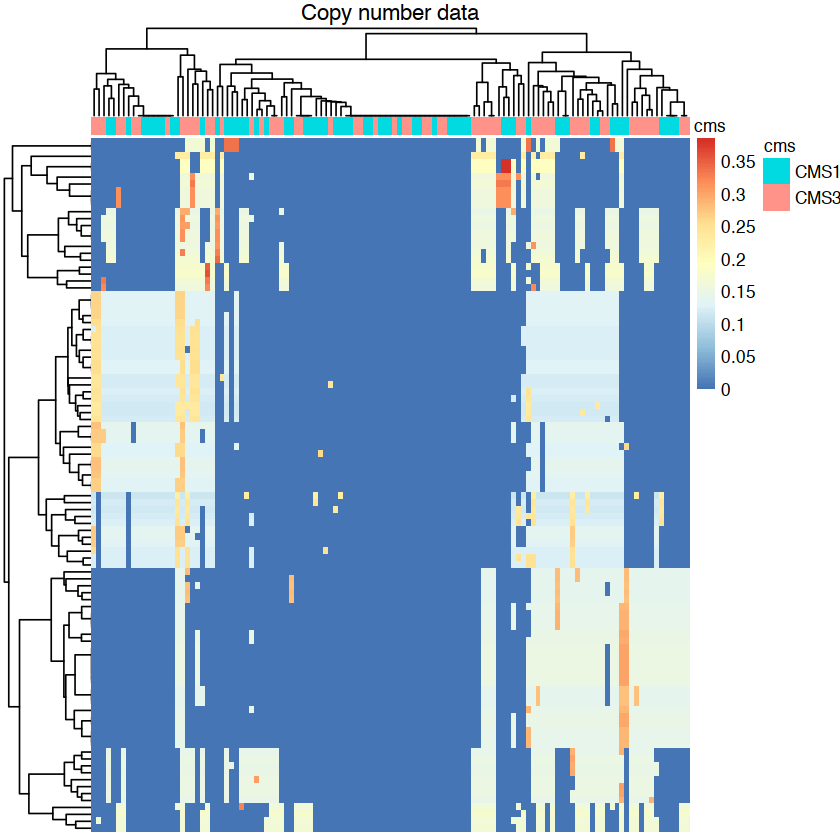

In [33]:
pheatmap::pheatmap(x3,
                   annotation_col = anno_col,
                   show_colnames = FALSE,
                   show_rownames = FALSE,
                   main="Copy number data")